In [78]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import imblearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, matthews_corrcoef, fowlkes_mallows_score
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

print(imblearn.__version__)

0.8.1


In [95]:
data = np.genfromtxt('creditcard.csv', delimiter=',', skip_header=1, dtype=float)
fraud_data = data[data[:,30]==1]
real_data = data[data[:,30]==0]
random_samples = np.random.choice(real_data.shape[0],real_data.shape[0]//10)
real_data = real_data[random_samples]
final_data = np.concatenate((real_data,fraud_data),axis=0)
final_data = final_data[:,1:31] #Extract columns we want
X_original = final_data[:,0:28]
y_original = final_data[:,29]

65


<IPython.core.display.Javascript object>


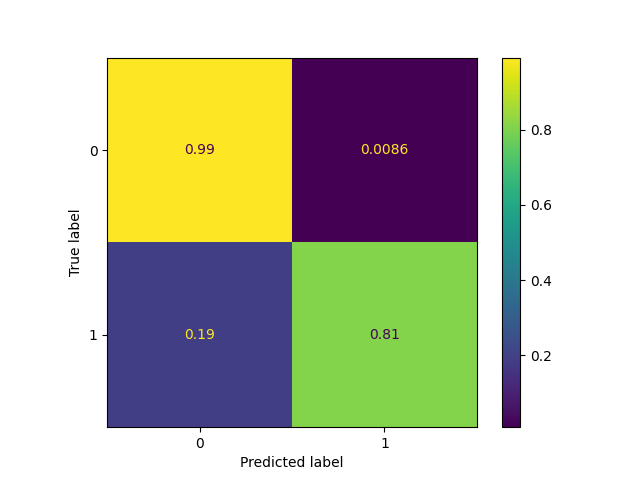

<IPython.core.display.Javascript object>


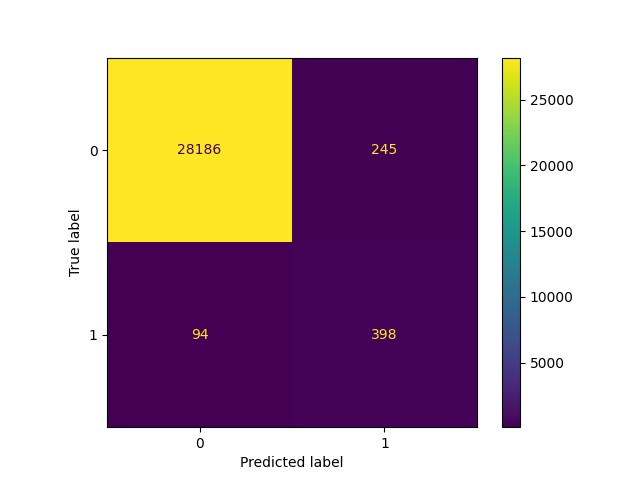

F1 Score 0.7013215859030838
Matthews 0.7019403570201075
Fowlkes Mallows 0.9879663126150219


In [96]:
clustering = DBSCAN(eps=6.2, min_samples=2).fit(X_original)
clustering.labels_[clustering.labels_<0]=1
fraud = np.where(clustering.labels_>0)
print(len(np.unique(clustering.labels_)))
clustering.labels_[clustering.labels_>0]=1
cm = confusion_matrix(y_original,clustering.labels_,normalize="true")
cm_2 = confusion_matrix(y_original,clustering.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
disp_2.plot()
plt.show()
f_1 = f1_score(y_original, clustering.labels_, average='binary')
matthews = matthews_corrcoef(y_original, clustering.labels_)
fms = fowlkes_mallows_score(y_original, clustering.labels_)
print("F1 Score", f_1)
print("Matthews", matthews)
print("Fowlkes Mallows", fms)

<IPython.core.display.Javascript object>


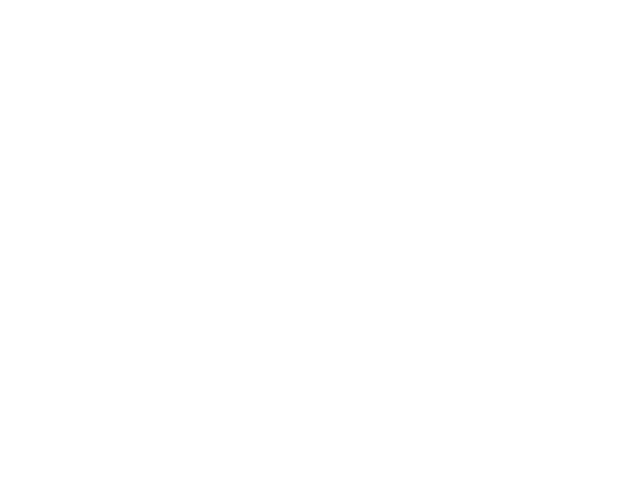

<IPython.core.display.Javascript object>


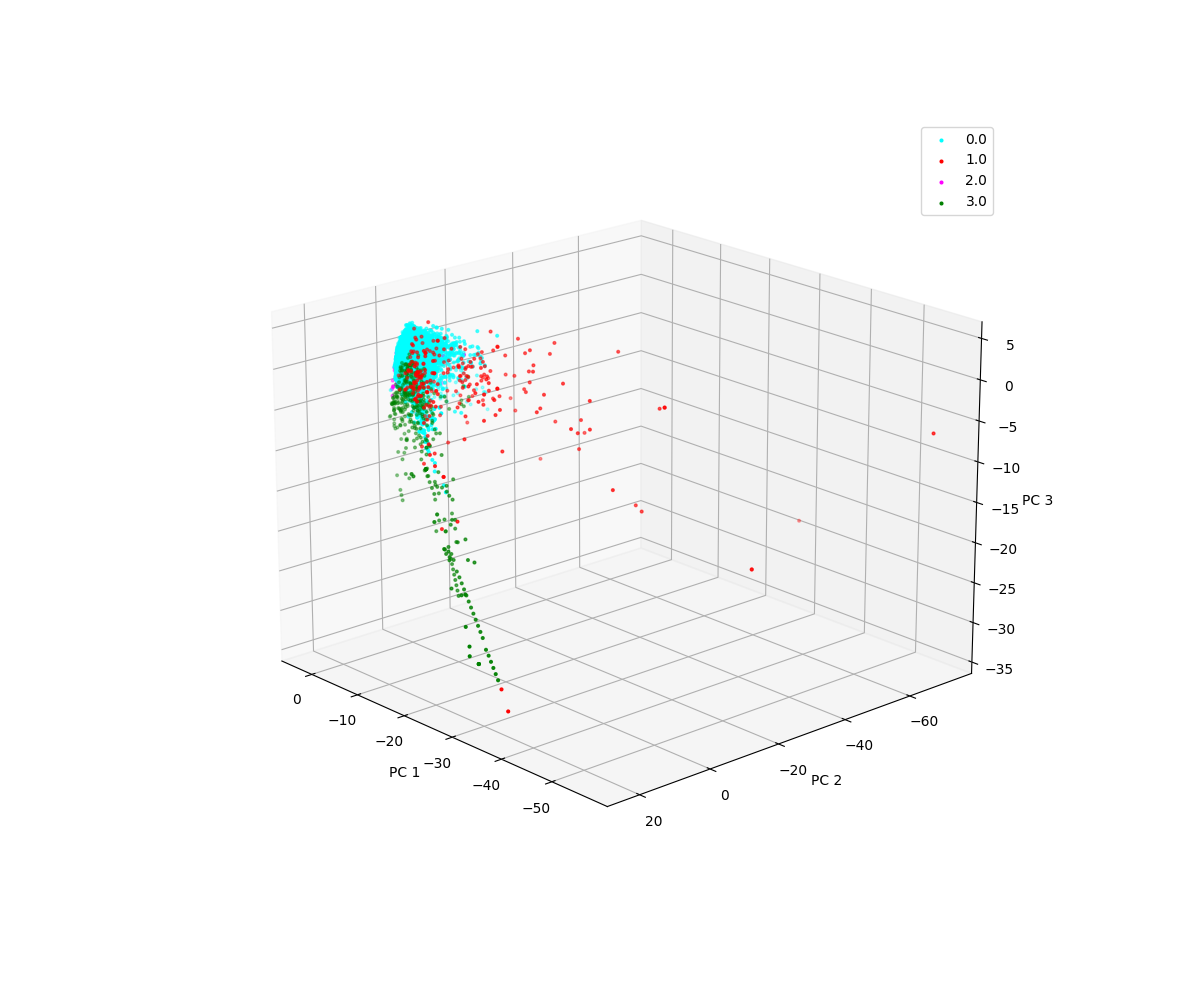

In [53]:
cm_plot = np.zeros((len(y_original),))
for i in range(len(y_original)):
    if y_original[i]==0 and clustering.labels_[i]==0:
        cm_plot[i] = 0
    if y_original[i]==0 and clustering.labels_[i]==1:
        cm_plot[i] = 1
    if y_original[i]==1 and clustering.labels_[i]==0:
        cm_plot[i] = 2
    if y_original[i]==1 and clustering.labels_[i]==1:
        cm_plot[i] = 3  
matches = y_original == clustering.labels_
c_dict = {0: 'cyan', 1: 'red', 2: 'magenta', 3: 'green', }
fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for g in np.unique(cm_plot):
        ix = np.where(cm_plot == g)
        ax.scatter(X_original[ix,0], X_original[ix,1], X_original[ix,2], c = c_dict[g], label = g, s = 15, marker='.')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
ax.set_zlabel('PC 3')
plt.legend()
plt.show()